### develop an intuition for a poisson-beta-bionomal likelihood function

In [1]:
import itertools
import numpy as np
from math import factorial as bang
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### the poisson binomial, parameterized by n, alpha and beta and conditioned on the object map

In [2]:
def poiss_beta_bin(k, n, alpha, beta, on_offs):
   A = map(set, itertools.combinations(range(n),k))
   Ac = map(set(range(n)).difference, A)
   A = map(list,A)
   Ac = map(list,Ac)
   probs = np.array(map(lambda x: (alpha+x)/(alpha+beta+1.), on_offs))
   pb = 0
   for j,l in zip(A,Ac):
     pb += probs[j].prod()*(1-probs[l]).prod()
   return pb

#### the pbb distribution for various parameters assuming an object map with n objects and a region/probe where there are m "ons" and n-m "offs" 

In [3]:
##number of objects in the mental image
n = 5

##assume a probe falls on a region where it overlaps three of the objects
on_offs = np.array([1,1,1,1,0])

##grid of alphas/betas to test
dns = 20
alpha_beta_range = np.linspace(0,10,dns)
a,b = meshgrid(alpha_beta_range, alpha_beta_range)


In [4]:
##evaluate probability at all points from 0 to n on the alpha/beta test grid
pbb_support = range(0,n+1)
pbb_distributions = map(lambda x,y: [poiss_beta_bin(kk,n,x,y,on_offs) for kk in pbb_support], a.flatten(), b.flatten())


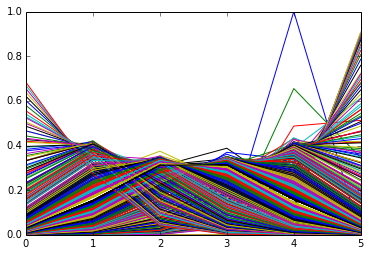

In [5]:
##plot distributions
figure()
skip_step = slice(0,-1)
for p_val,a_val,b_val in zip(pbb_distributions[skip_step], a.flatten()[skip_step], b.flatten()[skip_step]):
    plot(pbb_support, p_val, label='a=%0.2f,b=%0.2f' %(a_val,b_val))
#leg = legend(loc='upper left', shadow=True)
# Set the fontsize
#

#### examine the mean/variance over 2D alpha/beta range

In [6]:
##the set of "on" and "off" probabilities for this region (note there are only two unique values)
on_off_probs = map(lambda param1, param2: map(lambda x: (param1+x)/(param1+param2+1), on_offs), a.flatten(), b.flatten())
mu = np.array(map(sum, on_off_probs))
sigma = np.array(map(sum, map(lambda x: np.array(x)*(1-np.array(x)), on_off_probs)))
mode = np.array(map(np.argmax, pbb_distributions))



<matplotlib.colorbar.Colorbar instance at 0x37c0710>

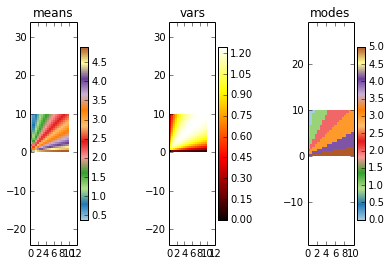

In [7]:
fig = figure()
fig.tight_layout
subplot(1,5,1)
title('means')
pcolor(a,b,mu.reshape(a.shape), cmap='Paired')
subplots_adjust(hspace = .001)
axis('equal')
colorbar()
subplot(1,5,3)
title('vars')
pcolor(a,b,sigma.reshape(a.shape), cmap='hot')
subplots_adjust(hspace = .001)
axis('equal')
colorbar()
subplot(1,5,5)
title('modes')
pcolor(a,b,mode.reshape(a.shape), cmap='Paired')
subplots_adjust(hspace = .001)
axis('equal')
colorbar()


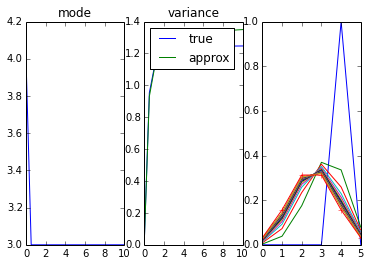

In [8]:
##special case where alpha = beta
num_plots = 3
is_equal = a.flatten() == b.flatten()
af = a.flatten()[is_equal]
subplot(1,num_plots,1)
title('mode')
plot(af, mode[is_equal])
subplot(1,num_plots,2)
title('variance')
plot(af, sigma[is_equal], label = 'true')
#plot(af, a.flatten()[is_equal], label = 'unity')
plot(af, log(1+af/(2.*af+1)*(n+1)), label = 'approx')  ##<<weird, I just guessed this and it is almost right
legend(loc='upper left')
subplot(1,num_plots,3)
for p_val,a_val in zip([pbb_distributions[ii] for ii in range(len(is_equal)) if is_equal[ii]], af):
    plot(pbb_support, p_val, label='a=%0.2f' %(a_val))
##limiting case
def lim_case_of_pbb(x):
    return np.array([bang(n)/(bang(n-ii)*bang(ii))*0.5**n for ii in x])
plot(pbb_support, lim_case_of_pbb(pbb_support), 'r+-')


#### examine distribution over nu/eta range


$$\alpha = \nu\eta $$
$$\beta = (1-\nu)\eta $$


In [9]:
##the set of "on" and "off" probabilities for this region (note there are only two unique values)
max_nu = 1
max_eta = 1
nu,eta = np.meshgrid(np.linspace(0, max_nu, 10),np.linspace(0, max_eta, 10))
pbb_distributions = map(lambda x,y: [poiss_beta_bin(kk,n,x,y,on_offs) for kk in pbb_support], (nu*eta).flatten(), ((1-nu)*eta).flatten())
on_off_probs = map(lambda param1, param2: map(lambda x: (param1+x)/(param1+param2+1), on_offs), (nu*eta).flatten(), ((1-nu)*eta).flatten())
mu = np.array(map(sum, on_off_probs))
sigma = np.array(map(sum, map(lambda x: np.array(x)*(1-np.array(x)), on_off_probs)))
mode = np.array(map(np.argmax, pbb_distributions))

(10, 10)
(10, 10)
(100,)
(100,)
(100,)


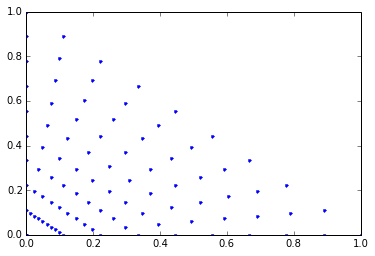

In [10]:
print nu.shape
print eta.shape
print mu.shape
print sigma.shape
print mode.shape
plot((nu*eta).flatten(), ((1-nu)*eta).flatten(), '.')

<matplotlib.colorbar.Colorbar instance at 0x3edba70>

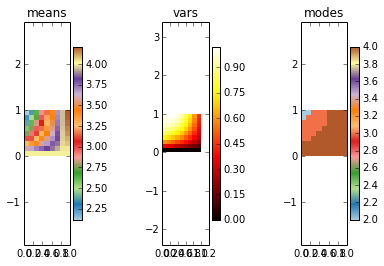

In [11]:
fig = figure()
fig.tight_layout
subplot(1,5,1)
title('means')
pcolor(nu,eta,mu.reshape(nu.shape), cmap='Paired')
subplots_adjust(hspace = .001)
axis('equal')
colorbar()
subplot(1,5,3)
title('vars')
pcolor(nu,eta,sigma.reshape(nu.shape), cmap='hot')
subplots_adjust(hspace = .001)
axis('equal')
colorbar()
subplot(1,5,5)
title('modes')
pcolor(nu,eta,mode.reshape(nu.shape), cmap='Paired')
subplots_adjust(hspace = .001)
axis('equal')
colorbar()

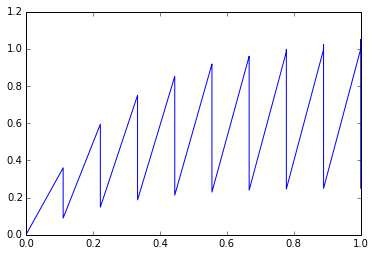

In [12]:
figure()
plot(eta.flatten(), sigma)

#### parameterize by p_on/p_off

In [13]:
##the set of "on" and "off" probabilities for this region (note there are only two unique values)
dns = 20
D = 20
p_on =  [np.array([ii]*np.max([np.ceil(D*ii),1])) for ii in linspace(0,1,dns)]
p_off = [linspace(0,ii[0],len(ii)) for ii in p_on]
p_on = [item for sublist in p_on for item in sublist]
p_off = [item for sublist in p_off for item in sublist]


on_off_probs = map(lambda y: map(lambda x: y[x], on_offs), zip(p_off,p_on))
mu = np.array(map(sum, on_off_probs))
sigma = np.array(map(sum, map(lambda x: np.array(x)*(1-np.array(x)), on_off_probs)))

#pbb_distributions = map(lambda x,y: [poiss_beta_bin(kk,n,x,y,on_offs) for kk in pbb_support], a.flatten(), b.flatten())
#mode = np.array(map(np.argmax, pbb_distributions))

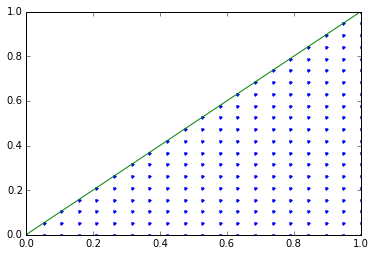

In [14]:
plot(p_on,p_off, '.')
plot(linspace(0,1,50), linspace(0,1,50))


<matplotlib.colorbar.Colorbar instance at 0x48081b8>

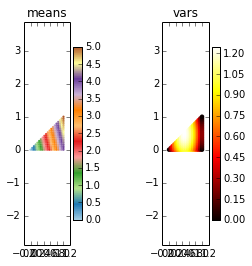

In [15]:

fig = figure()
fig.tight_layout
subplot(1,5,1)
title('means')
scatter(p_on,p_off,c=mu, cmap='Paired', marker = '.', linewidth = 0)
subplots_adjust(hspace = .001)
axis('equal')
colorbar()
subplot(1,5,3)
title('vars')
scatter(p_on,p_off,c=sigma, cmap='hot', linewidth = 0)
subplots_adjust(hspace = .001)
axis('equal')
colorbar()
#subplot(1,5,5)
#title('modes')
#pcolor(p_on,p_off,mode.reshape(a.shape), cmap='Paired')
#subplots_adjust(hspace = .001)
#axis('equal')
#colorbar()

(array([  5.,   8.,  14.,  17.,  23.,  27.,  32.,  35.,  34.,  15.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

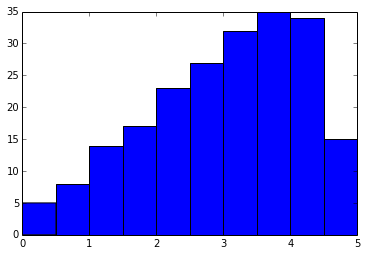

In [16]:
hist(mu)